In [1]:
import numpy as np

In [11]:
!wget http://www.soshnikov.com/permanent/data/akar_en.txt

--2022-12-20 13:46:43--  http://www.soshnikov.com/permanent/data/akar_en.txt
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2068089 (2.0M) [text/plain]
Saving to: ‘akar_en.txt’

akar_en.txt         100%[===================>]   1.97M   255KB/s    in 8.3s    

2022-12-20 13:46:52 (242 KB/s) - ‘akar_en.txt’ saved [2068089/2068089]



In [21]:
text = open('akar_en.txt','r',encoding='utf-8').readlines()
text = [ x.strip() for x in text ]

In [26]:
def paragraphs(text):
    current = []
    for x in text:
        if x=="":
            yield ' '.join(current)
            current = []
        else:
            current.append(x)
    yield ' '.join(current)

list(paragraphs(text))[105:125]

['He took off the mantelpiece, where he had put it yesterday, a little box of sweets, and gave her two, picking out her favorites, a chocolate and a fondant.',
 '“For Grisha?” said the little girl, pointing to the chocolate.',
 '“Yes, yes.” And still stroking her little shoulder, he kissed her on the roots of her hair and neck, and let her go.',
 '“The carriage is ready,” said Matvey; “but there’s someone to see you with a petition.”',
 '“Been here long?” asked Stepan Arkadyevitch.',
 '“Half an hour.”',
 '“How many times have I told you to tell me at once?”',
 '“One must let you drink your coffee in peace, at least,” said Matvey, in the affectionately gruff tone with which it was impossible to be angry.',
 '“Well, show the person up at once,” said Oblonsky, frowning with vexation.',
 'The petitioner, the widow of a staff captain Kalinin, came with a request impossible and unreasonable; but Stepan Arkadyevitch, as he generally did, made her sit down, heard her to the end attentively wit

In [36]:
prot = ['Anna','Levin','Vronsky','Karenin','Kitty']

M = np.zeros((len(prot),len(prot)))

In [37]:
M

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [38]:
for p in paragraphs(text):
  for i,p1 in enumerate(prot):
    for j,p2 in enumerate(prot):
      if p1 in p and p2 in p:
        M[i,j]+=1


In [63]:
M1 = (1-np.eye(len(prot)))*M
M1

array([[  0.,  18., 152.,  24.,  43.],
       [ 18.,   0.,  57.,   6., 146.],
       [152.,  57.,   0.,  25.,  42.],
       [ 24.,   6.,  25.,   0.,   6.],
       [ 43., 146.,  42.,   6.,   0.]])

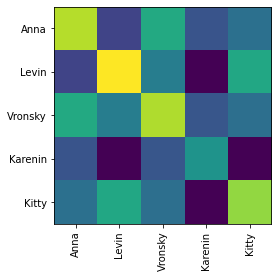

In [65]:
import matplotlib.pyplot as plt
plt.imshow(np.log(M))
plt.xticks(range(len(prot)),prot,rotation=90)
plt.yticks(range(len(prot)),prot)
plt.show()

In [45]:
v = np.random.uniform(0,10,size=10)
v

array([1.73845772, 8.2906814 , 3.3019411 , 4.7147825 , 3.41895844,
       0.77761964, 7.30968121, 4.65364487, 0.57830711, 9.49901463])

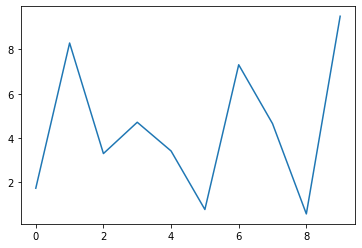

In [46]:
plt.plot(v)

<BarContainer object of 10 artists>

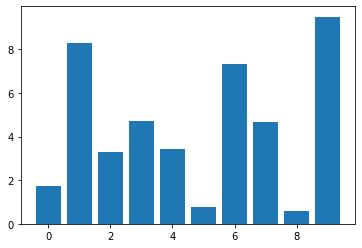

In [48]:
plt.bar(range(len(v)),v)

<BarContainer object of 10 artists>

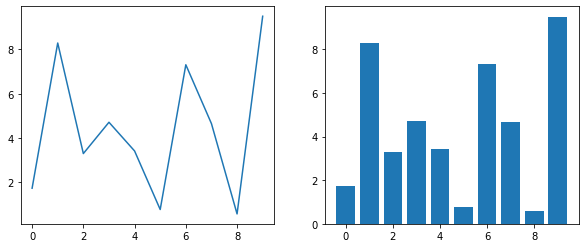

In [50]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(v)
ax[1].bar(range(len(v)),v)

In [66]:
import pandas as pd 


In [69]:
s1 = pd.Series(["I","like","Pandas"])
s1

0         I
1      like
2    Pandas
dtype: object

In [75]:
s2 = pd.Series([1,2,3],index=[1,2,3])
s2

1    1
2    2
3    3
dtype: int64

In [76]:
s1+' '+s2.apply(str)

0         NaN
1      like 1
2    Pandas 2
3         NaN
dtype: object

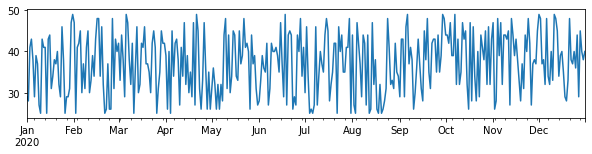

In [78]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,2))
plt.show()

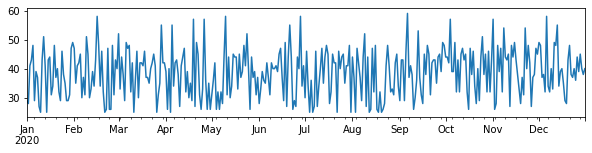

In [82]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
total_items = items_sold.add(additional_items,fill_value=0)
total_items.plot(figsize=(10,2))
plt.show()

In [84]:
df = pd.DataFrame([items_sold,additional_items,total_items]).T
df

,0,1,2
2020-01-01,29.0,NaN,29.0
2020-01-02,28.0,NaN,28.0
2020-01-03,41.0,NaN,41.0
2020-01-04,43.0,NaN,43.0
2020-01-05,38.0,10.0,48.0
...,...,...,...
2020-12-27,29.0,10.0,39.0
2020-12-28,45.0,NaN,45.0
2020-12-29,40.0,NaN,40.0
2020-12-30,38.0,NaN,38.0


In [87]:
df = pd.DataFrame({ "sold" : items_sold, "add" : additional_items})
df

,sold,add
2020-01-01,29,NaN
2020-01-02,28,NaN
2020-01-03,41,NaN
2020-01-04,43,NaN
2020-01-05,38,10.0
...,...,...
2020-12-27,29,10.0
2020-12-28,45,NaN
2020-12-29,40,NaN
2020-12-30,38,NaN


In [90]:
df['add'].fillna(0,inplace=True)
df['total'] = df['sold']+df['add']
df

,sold,add,total
2020-01-01,29,0.0,29.0
2020-01-02,28,0.0,28.0
2020-01-03,41,0.0,41.0
2020-01-04,43,0.0,43.0
2020-01-05,38,10.0,48.0
...,...,...,...
2020-12-27,29,10.0,39.0
2020-12-28,45,0.0,45.0
2020-12-29,40,0.0,40.0
2020-12-30,38,0.0,38.0


In [91]:
df = pd.read_csv('titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [97]:
df['relatives'] = df['sibsp'] + df['parch']

In [92]:
df['survived'].mean()

0.3819709702062643

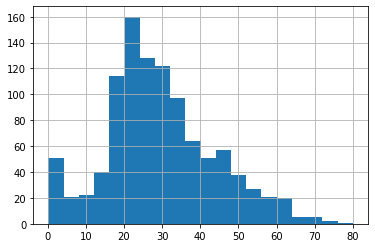

In [95]:
df['age'].hist(bins=20)

In [98]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO,0
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON,3
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,3
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON,3
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


In [101]:
df['nlen'] = df['name'].apply(len)

In [102]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives,nlen
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO,0,29
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON,3,30
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,3,28
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON,3,36
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,3,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,20
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,21
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,25
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,19


In [107]:
print(df[df['sex']=='male']['survived'].mean())
print(df[df['sex']=='female']['survived'].mean())

0.19098457888493475
0.7274678111587983


In [110]:
df.groupby('sex').mean()['survived']

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [115]:
df.groupby('sex').aggregate( { 'survived' : lambda x : x.mean(), 
                               'name' : 'count', 
                               'age' : 'mean' }).rename(columns = { 'name' : 'count'})

,survived,count,age
sex,,,
female,0.727468,466,28.687071
male,0.190985,843,30.585233


In [117]:
df.groupby(['pclass','sex']).aggregate( { 'survived' : lambda x : x.mean(), 
                               'name' : 'count', 
                               'age' : 'mean' }).rename(columns = { 'name' : 'count'})

survived  count        age
pclass sex                               
1      female  0.965278    144  37.037594
       male    0.340782    179  41.029250
2      female  0.886792    106  27.499191
       male    0.146199    171  30.815401
3      female  0.490741    216  22.185307
       male    0.152130    493  25.962273

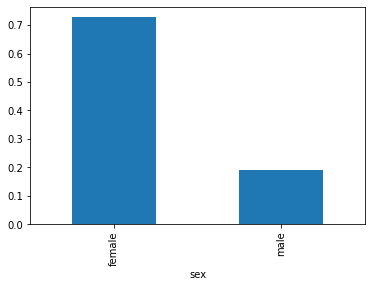

In [121]:
df.groupby('sex').mean()['survived'].plot.bar()